In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import folium
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("../../../csv/v2/060_yonge_flow_processed.csv.zip")

In [3]:
df["collectedAt"] = pd.to_datetime(df["collectedAt"], utc=True)
df["collectedAt"] = df.collectedAt.dt.floor(freq="s")
df["year"] = df["collectedAt"].dt.year
df["month"] = df["collectedAt"].dt.month
df["day"] = df["collectedAt"].dt.day
df["hour"] = df["collectedAt"].dt.hour
df["dow"] = df["collectedAt"].dt.day_of_week
df["dow_name"] = df["collectedAt"].dt.day_name()
df["month_name"] = df["collectedAt"].dt.month_name()
df["year_month"] = df["collectedAt"].dt.to_period("M").astype(str)
df["year_month_day"] = df["collectedAt"].dt.to_period("D").astype(str)

C:\Users\felip\AppData\Local\Temp\ipykernel_17348\3071565371.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["collectedAt"].dt.to_period("M").astype(str)
C:\Users\felip\AppData\Local\Temp\ipykernel_17348\3071565371.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month_day"] = df["collectedAt"].dt.to_period("D").astype(str)


In [4]:
df.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,year,month,day,hour,dow,dow_name,month_name,year_month,year_month_day
0,10,18,100,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:45:00+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
1,13,17,77,59,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:51:44+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
2,18,18,56,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:55:27+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
3,13,18,77,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 13:00:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14
4,14,17,72,59,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 13:05:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14


In [5]:
speed_df = df[["month_name", "month", "day", "currentSpeed", "freeFlowSpeed"]]
speed_dfm = speed_df.melt(["month_name","month","day"],var_name="speedType",value_name="value")
speed_dfm

,month_name,month,day,speedType,value
0,July,7,14,currentSpeed,10
1,July,7,14,currentSpeed,13
2,July,7,14,currentSpeed,18
3,July,7,14,currentSpeed,13
4,July,7,14,currentSpeed,14
...,...,...,...,...,...
116021,January,1,31,freeFlowSpeed,18
116022,January,1,31,freeFlowSpeed,17
116023,January,1,31,freeFlowSpeed,18
116024,January,1,31,freeFlowSpeed,18


## Current Speed vs. Free Flow Speed
- The plot below shows how current and ff speeds compare, month to month

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


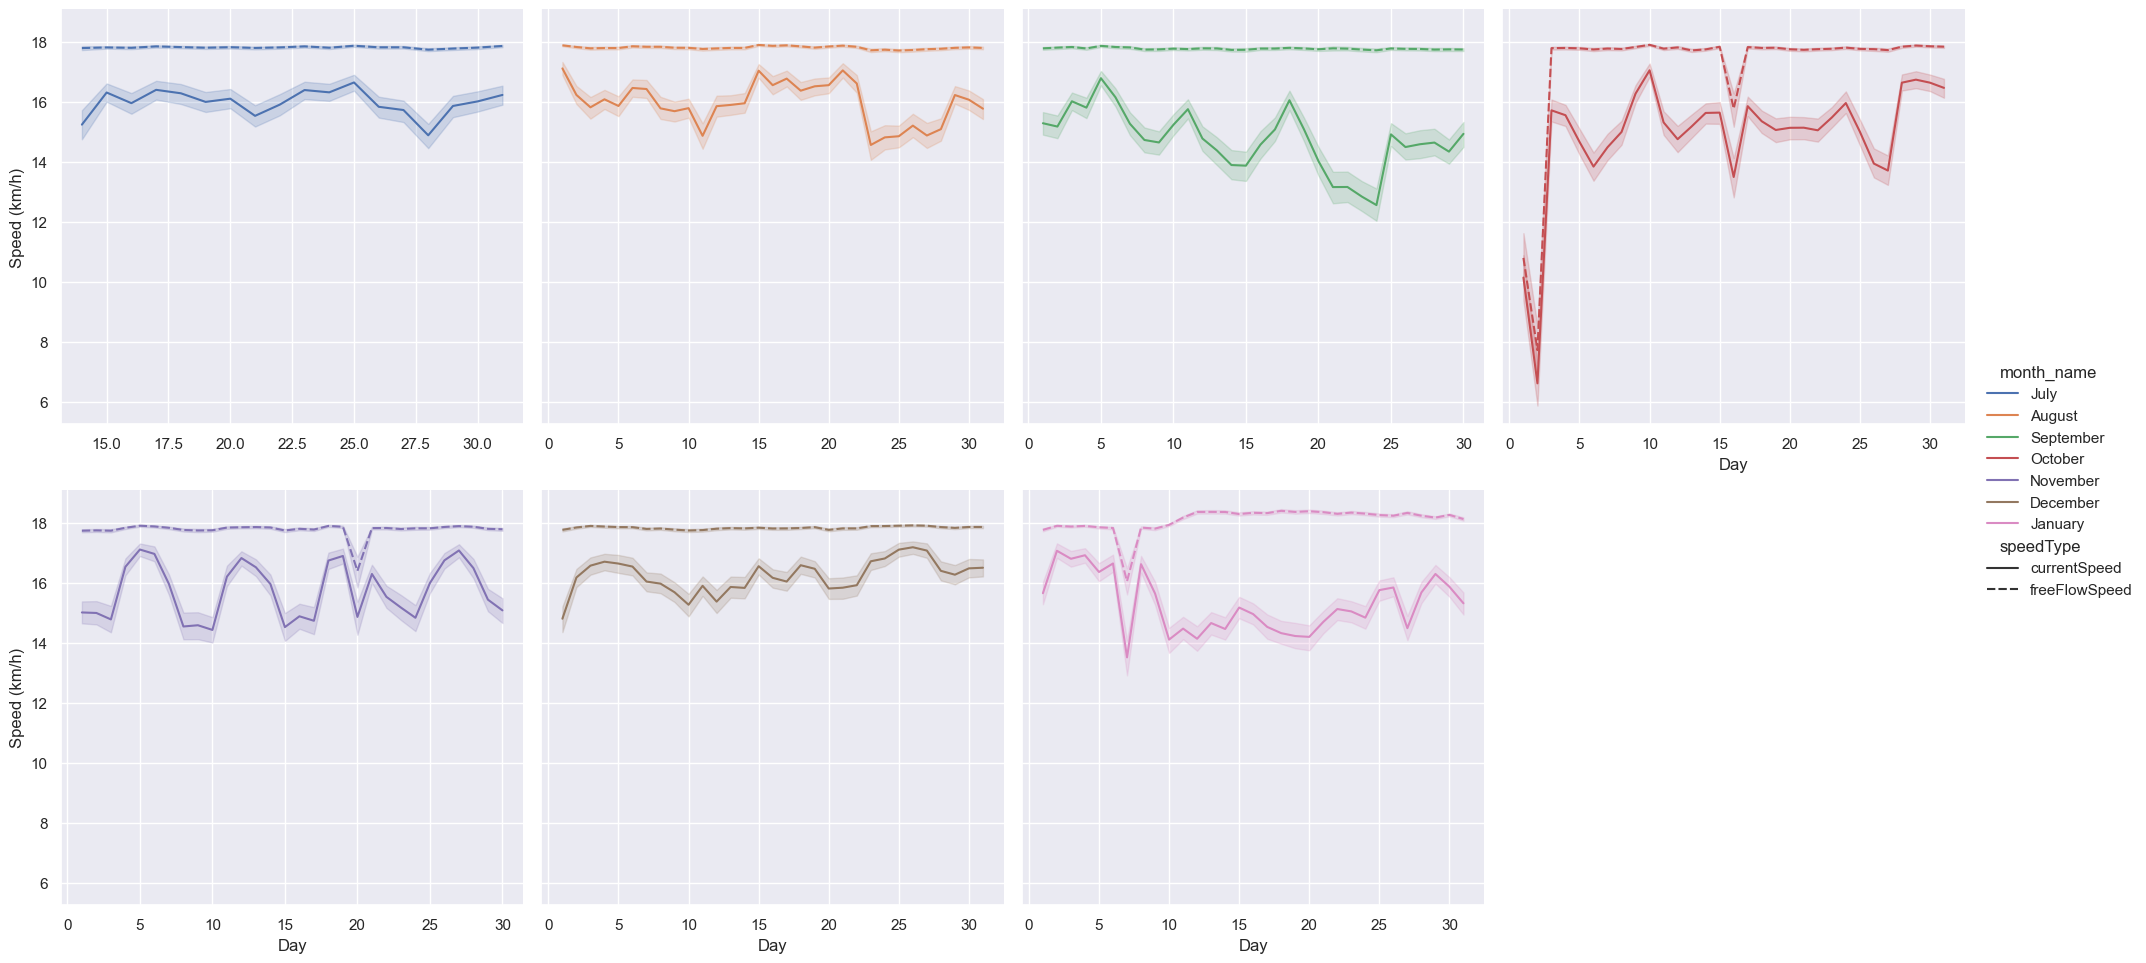

In [8]:
g = sns.relplot(data=speed_dfm,x="day",y="value",col="month_name",hue="month_name",style="speedType",
                col_wrap=4,kind="line",facet_kws={"sharex":False})
g.set_axis_labels("Day", "Speed (km/h)")
g.set_titles(col_template="")
plt.savefig("./plots/030_current_speed_vs_free_flow.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/030_current_speed_vs_free_flow.png", bbox_inches="tight")